In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/laptop_data.csv')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [15]:
# Suppression de la colonne inutile
data.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
# Nettoyage de la RAM (enlever 'GB' et convertir en entier)
data['Ram'] = data['Ram'].str.replace('GB', '', regex=False).astype(int)

In [17]:
# Nettoyage du poids (enlever 'kg' et convertir en float)
data['Weight'] = data['Weight'].str.replace('kg', '', regex=False).astype(float)

In [18]:
# Conversion des prix CFA en USD (taux approximatif : 1 USD = 600 CFA)
exchange_rate = 600
data['Price_USD'] = (data['Price'] / exchange_rate).round(2)

# Nettoyage du prix (arrondi en entier)
data['Price'] = data['Price'].round(0).astype(int)
# Aperçu des colonnes avec prix CFA et USD
data[['Price', 'Price_USD']].head()

,Price,Price_USD
0,71379,118.96
1,47896,79.83
2,30636,51.06
3,135195,225.33
4,96096,160.16


In [19]:
# Extraction des informations du champ 'Cpu (GHz)'
# On separe les élements de cpu en cpu_marque et cpu_modele_freq
data[['Cpu_Brand', 'Cpu_Model_Freq']] = data['Cpu'].str.extract(r'(\w+)\s+(.*)')
# On separe les élements de cpu_model_freq en cpu_modèle et cpu_freq_GHz
data[['Cpu_Model', 'Cpu_Freq_GHz']] = data['Cpu_Model_Freq'].str.extract(r'(.*)\s([\d.]+)GHz')
# On converti nos frequences en nbre décimal
data['Cpu_Freq_GHz'] = data['Cpu_Freq_GHz'].astype(float)

In [20]:
# Fonction pour extraire le fabricant
def extract_gpu_brand(gpu):
    if 'NVIDIA' in gpu.upper():
        return 'Nvidia'
    elif 'AMD' in gpu.upper():
        return 'AMD'
    elif 'INTEL' in gpu.upper():
        return 'Intel'
    else:
        return 'Other'

# Fonction pour extraire le modèle (optionnel, si utile pour ton analyse)
def extract_gpu_model(gpu):
    return ' '.join(gpu.split()[1:])

# Création des nouvelles colonnes
data['Gpu_Brand'] = data['Gpu'].apply(extract_gpu_brand)
data['Gpu_Model'] = data['Gpu'].apply(extract_gpu_model)
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Price_USD,Cpu_Brand,Cpu_Model_Freq,Cpu_Model,Cpu_Freq_GHz,Gpu_Brand,Gpu_Model
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,118.96,Intel,Core i5 2.3GHz,Core i5,2.3,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,79.83,Intel,Core i5 1.8GHz,Core i5,1.8,Intel,HD Graphics 6000
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,51.06,Intel,Core i5 7200U 2.5GHz,Core i5 7200U,2.5,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,225.33,Intel,Core i7 2.7GHz,Core i7,2.7,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,160.16,Intel,Core i5 3.1GHz,Core i5,3.1,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33993,56.65,Intel,Core i7 6500U 2.5GHz,Core i7 6500U,2.5,Intel,HD Graphics 520
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79867,133.11,Intel,Core i7 6500U 2.5GHz,Core i7 6500U,2.5,Intel,HD Graphics 520
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201,20.34,Intel,Celeron Dual Core N3050 1.6GHz,Celeron Dual Core N3050,1.6,Intel,HD Graphics
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40706,67.84,Intel,Core i7 6500U 2.5GHz,Core i7 6500U,2.5,AMD,Radeon R5 M330


In [21]:
import re

def extract_storage(storage_string, storage_type):
    total = 0
    # Cherche des correspondances du type "512GB SSD", "1TB HDD", etc.
    for match in re.finditer(r'(\d+\.?\d*)\s*(GB|TB)\s*(' + storage_type + ')', storage_string, re.IGNORECASE):
        size, unit, _ = match.groups()
        size = float(size)
        if unit.upper() == 'TB':
            size *= 1024  # conversion TB en GB
        total += size
    return int(total)

# Fonction d'extraction des tailles pour un type de stockage donné
def extract_storage(storage_string, storage_type):
    total = 0
    matches = re.finditer(
        rf'(\d+\.?\d*)\s*(GB|TB)\s*{storage_type}', storage_string, re.IGNORECASE
    )
    for match in matches:
        size, unit = match.groups()
        size = float(size)
        if unit.upper() == 'TB':
            size *= 1024
        total += size
    return int(total)

# Appliquer l'extraction à chaque type de mémoire
data['SSD_GB'] = data['Memory'].apply(lambda x: extract_storage(x, 'SSD'))
data['HDD_GB'] = data['Memory'].apply(lambda x: extract_storage(x, 'HDD'))
data['Hybrid_GB'] = data['Memory'].apply(lambda x: extract_storage(x, 'Hybrid'))
data['Flash_GB'] = data['Memory'].apply(lambda x: extract_storage(x, 'Flash'))

# Calculer la mémoire totale
data['Total_Memory_GB'] = data[['SSD_GB', 'HDD_GB', 'Hybrid_GB', 'Flash_GB']].sum(axis=1)

# Afficher un aperçu du résultat
data[['Memory', 'SSD_GB', 'HDD_GB', 'Hybrid_GB', 'Flash_GB', 'Total_Memory_GB']].head()

,Memory,SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,Total_Memory_GB
0,128GB SSD,128,0,0,0,128
1,128GB Flash Storage,0,0,0,128,128
2,256GB SSD,256,0,0,0,256
3,512GB SSD,512,0,0,0,512
4,256GB SSD,256,0,0,0,256


In [22]:
# Extraction des détails de l'écran
# 1. Est-ce un écran tactile ?
data['IsTouchscreen'] = data['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)

# 2. Extraire largeur et hauteur
resolution_pattern = r'(\d{3,4})x(\d{3,4})'
res_matches = data['ScreenResolution'].str.extract(resolution_pattern)
data['Resolution_Width'] = res_matches[0].astype(float)
data['Resolution_Height'] = res_matches[1].astype(float)

# 3. Calcul des pixels totaux
data['TotalPixels'] = data['Resolution_Width'] * data['Resolution_Height']

# 4. Extraire le type d'écran (Full HD, 4K, etc.)
def extract_display_type(screen_text):
    screen_text = screen_text.lower()
    if '4k' in screen_text:
        return '4K'
    elif 'ultra hd' in screen_text:
        return 'Ultra HD'
    elif 'quad hd' in screen_text or 'qhd' in screen_text:
        return 'Quad HD'
    elif 'full hd' in screen_text:
        return 'Full HD'
    elif 'hd+' in screen_text:
        return 'HD+'
    elif 'hd' in screen_text:
        return 'HD'
    else:
        return 'Other'

data['DisplayType'] = data['ScreenResolution'].apply(extract_display_type)

# 5. Forme standardisée (facultatif)
data['ScreenResolution_Standardized'] = (
    data['Resolution_Width'].astype(int).astype(str) + 'x' +
    data['Resolution_Height'].astype(int).astype(str)
)

In [23]:
# Renommer les colonnes
data.rename(columns={
    'Inches': 'Inches_Pouces',
    'Ram': 'Ram_GB',
    'Weight': 'Weight_Kg',
    'Price': 'Price_CFA'
}, inplace=True)

In [24]:
data

,Company,TypeName,Inches_Pouces,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_Kg,...,HDD_GB,Hybrid_GB,Flash_GB,Total_Memory_GB,IsTouchscreen,Resolution_Width,Resolution_Height,TotalPixels,DisplayType,ScreenResolution_Standardized
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,0,0,128,0,2560.0,1600.0,4096000.0,Other,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,128,128,0,1440.0,900.0,1296000.0,Other,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,0,256,0,1920.0,1080.0,2073600.0,Full HD,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,0,0,0,512,0,2880.0,1800.0,5184000.0,Other,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,0,0,256,0,2560.0,1600.0,4096000.0,Other,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,0,0,0,128,1,1920.0,1080.0,2073600.0,Full HD,1920x1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,0,0,0,512,1,3200.0,1800.0,5760000.0,Quad HD,3200x1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,0,0,64,64,0,1366.0,768.0,1049088.0,Other,1366x768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,1024,0,0,1024,0,1366.0,768.0,1049088.0,Other,1366x768


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        1303 non-null   object 
 1   TypeName                       1303 non-null   object 
 2   Inches_Pouces                  1303 non-null   float64
 3   ScreenResolution               1303 non-null   object 
 4   Cpu                            1303 non-null   object 
 5   Ram_GB                         1303 non-null   int64  
 6   Memory                         1303 non-null   object 
 7   Gpu                            1303 non-null   object 
 8   OpSys                          1303 non-null   object 
 9   Weight_Kg                      1303 non-null   float64
 10  Price_CFA                      1303 non-null   int64  
 11  Price_USD                      1303 non-null   float64
 12  Cpu_Brand                      1303 non-null   o

In [26]:
data.describe()

,Inches_Pouces,Ram_GB,Weight_Kg,Price_CFA,Price_USD,Cpu_Freq_GHz,SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,Total_Memory_GB,IsTouchscreen,Resolution_Width,Resolution_Height,TotalPixels
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03
mean,15.017191,8.382195,2.038734,59870.099002,99.783446,2.298772,184.027629,422.477360,9.034536,4.555641,620.095165,0.147352,1894.784344,1070.830391,2.168807e+06
std,1.426304,5.084665,0.665475,37243.221564,62.071852,0.506340,188.268689,528.006298,94.738890,30.274090,479.733442,0.354593,494.641028,284.519410,1.391292e+06
min,10.100000,2.000000,0.690000,9271.000000,15.450000,0.900000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1366.000000,768.000000,1.049088e+06
25%,14.000000,4.000000,1.500000,31915.000000,53.190000,2.000000,0.000000,0.000000,0.000000,0.000000,256.000000,0.000000,1600.000000,900.000000,1.440000e+06
50%,15.600000,8.000000,2.040000,52055.000000,86.760000,2.500000,256.000000,0.000000,0.000000,0.000000,500.000000,0.000000,1920.000000,1080.000000,2.073600e+06
75%,15.600000,8.000000,2.300000,79274.000000,132.125000,2.700000,256.000000,1024.000000,0.000000,0.000000,1024.000000,0.000000,1920.000000,1080.000000,2.073600e+06
max,18.400000,64.000000,4.700000,324955.000000,541.590000,3.600000,1024.000000,2048.000000,1024.000000,512.000000,2560.000000,1.000000,3840.000000,2160.000000,8.294400e+06


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, hue='Price_CFA', height=5)

Output hidden; open in https://colab.research.google.com to view.

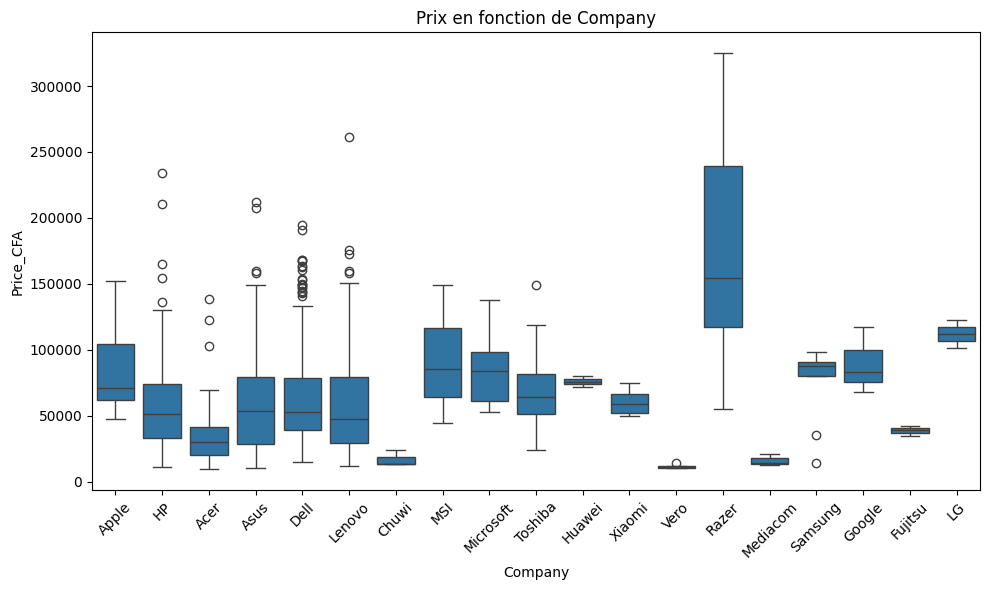

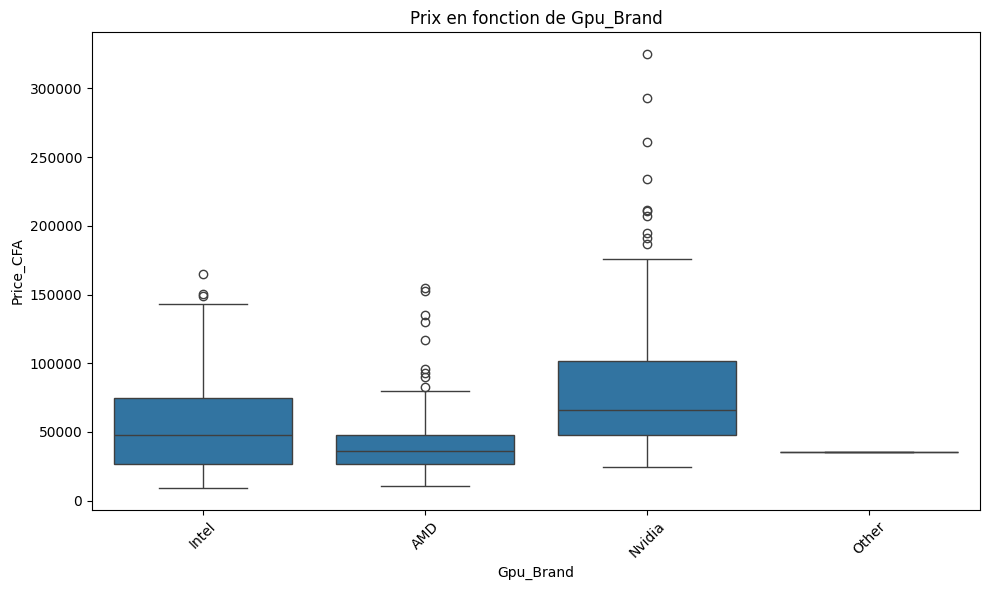

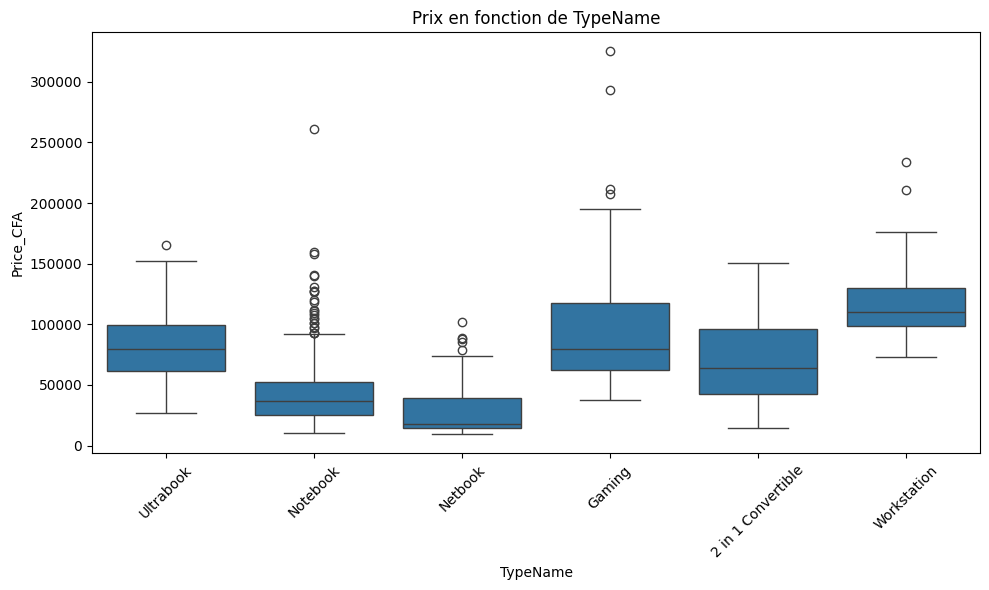

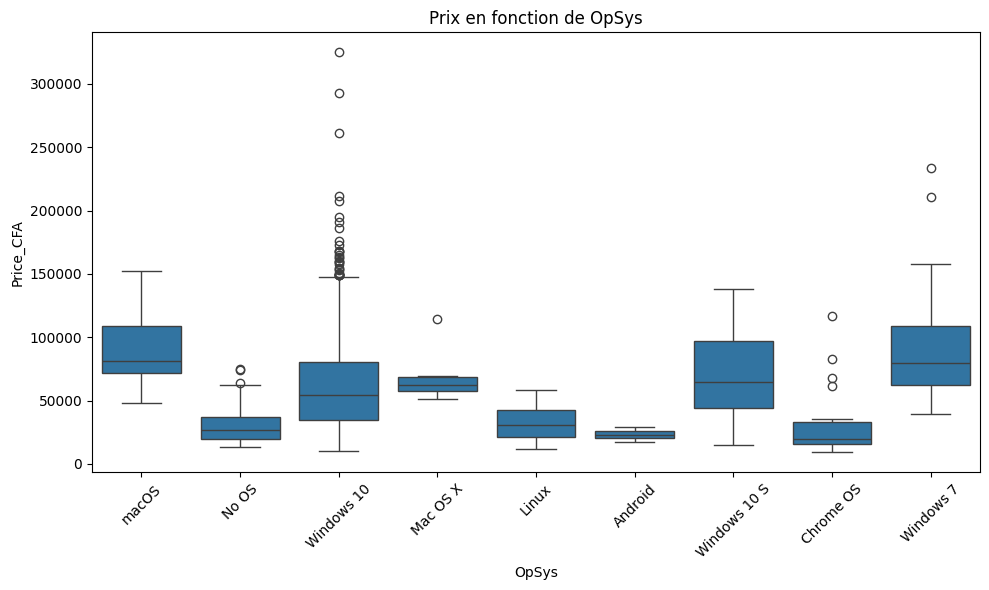

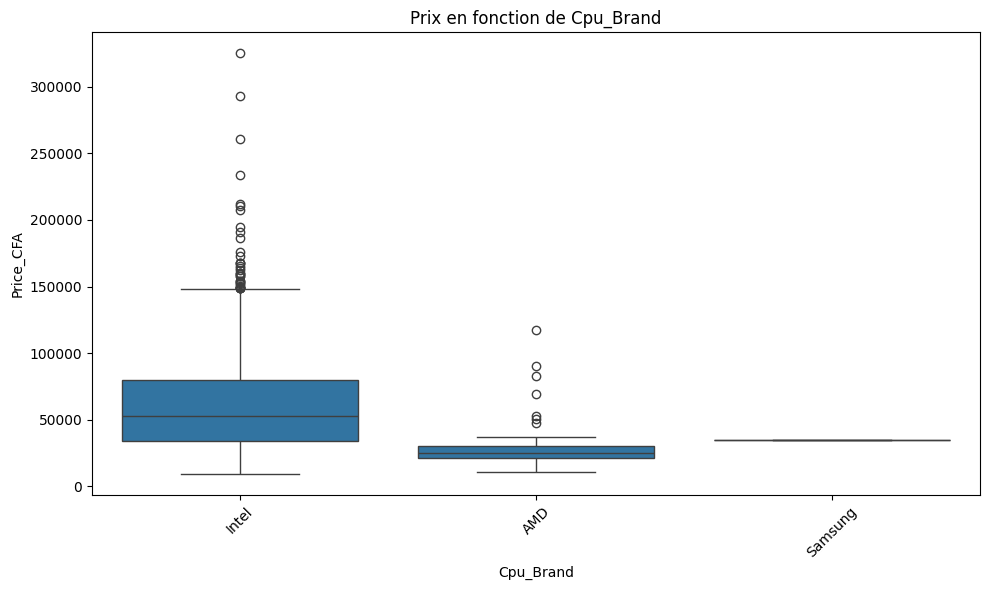

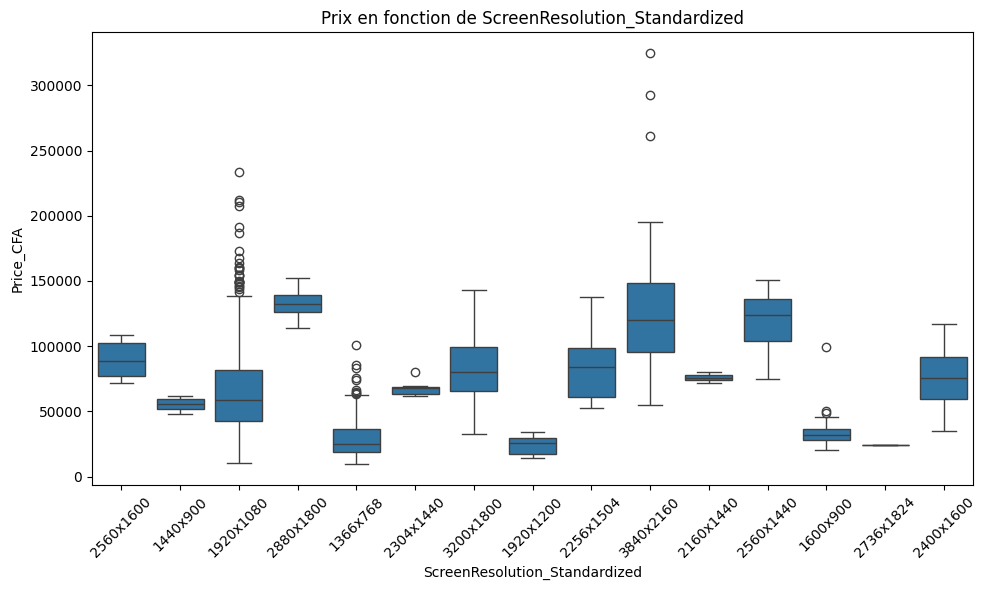

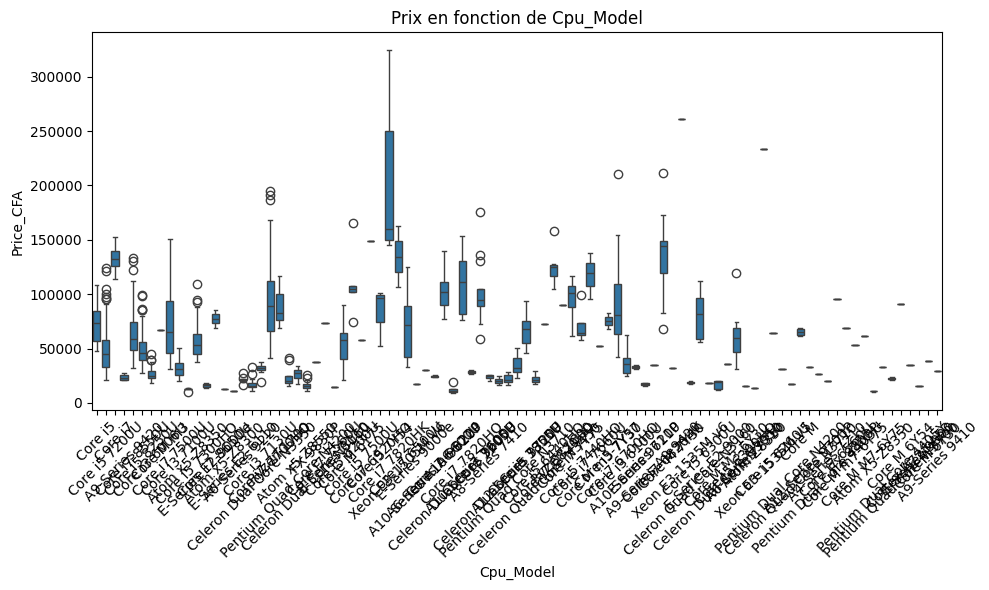

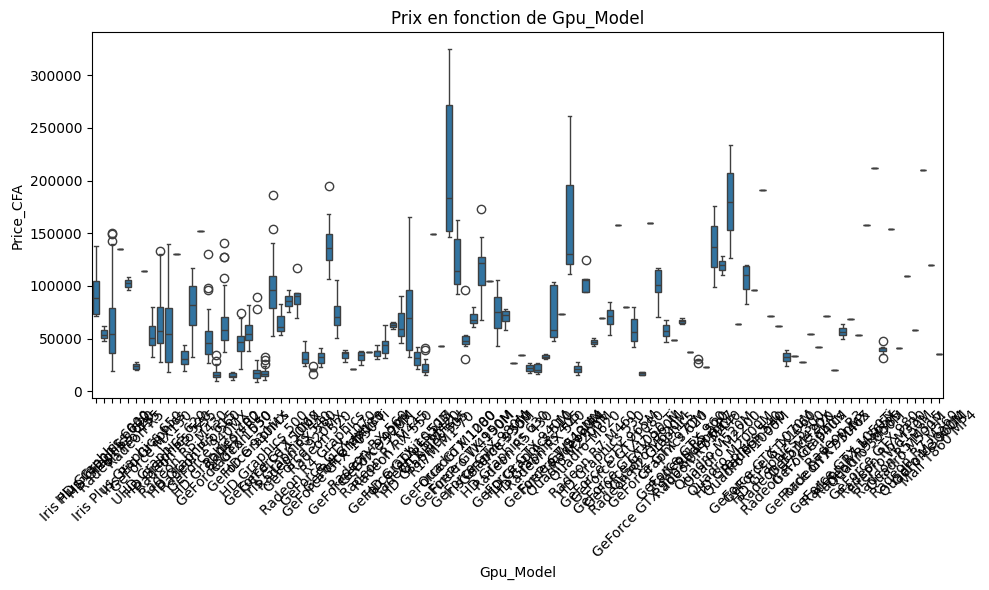

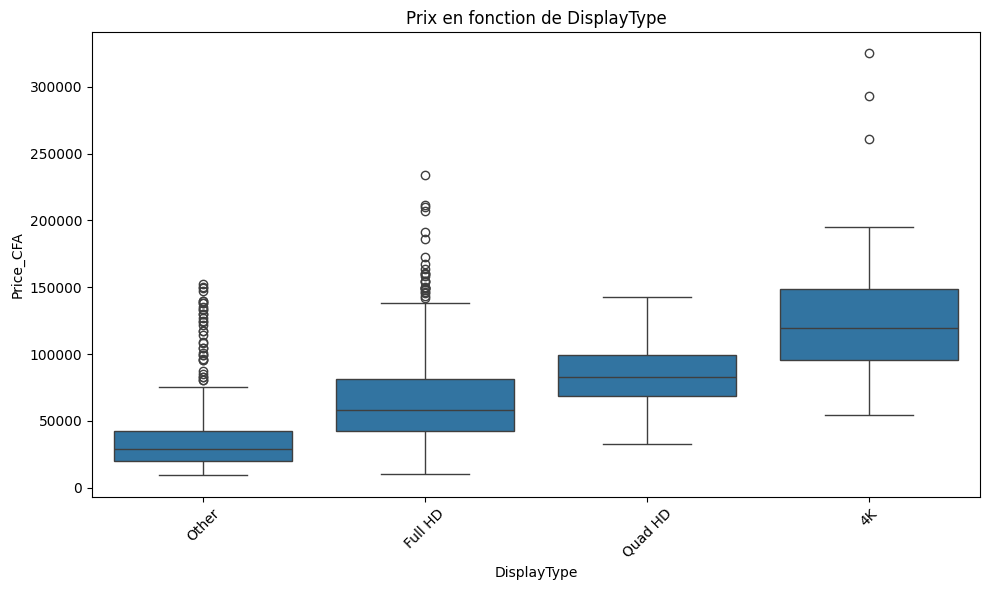

In [28]:
cat_cols = ['Company', 'Gpu_Brand', 'TypeName', 'OpSys',
            'Cpu_Brand', 'ScreenResolution_Standardized', 'Cpu_Model', 'Gpu_Model', 'DisplayType']

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Price_CFA', data=data)
    plt.title(f"Prix en fonction de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [29]:
# Encodage des variables catégorielles
categorical_cols = ['Company', 'Gpu_Brand', 'TypeName', 'OpSys',
                    'Cpu_Brand', 'DisplayType', 'ScreenResolution_Standardized',
                    'Cpu_Model_Freq', 'Cpu_Model', 'Gpu_Model', 'DisplayType']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Facultatif : Sélectionner seulement les colonnes numériques pertinentes
correlation_features = ['Inches_Pouces', 'Ram_GB', 'Weight_Kg', 'Price_CFA','Price_USD',
                        'Cpu_Freq_GHz','Total_Memory_GB', 'IsTouchscreen', 'Resolution_Width',
                        'Resolution_Height', 'TotalPixels',	'SSD_GB', 'HDD_GB', 'Hybrid_GB', 'Flash_GB']
numerical_data = data_encoded.select_dtypes(include='number')  # sélectionne toutes les colonnes numériques

In [30]:
# Calcul de la matrice de corrélation
correlation_matrix = numerical_data.corr()

In [31]:
data_encoded.dtypes.value_counts()

,count
bool,370
int64,8
float64,7
object,4


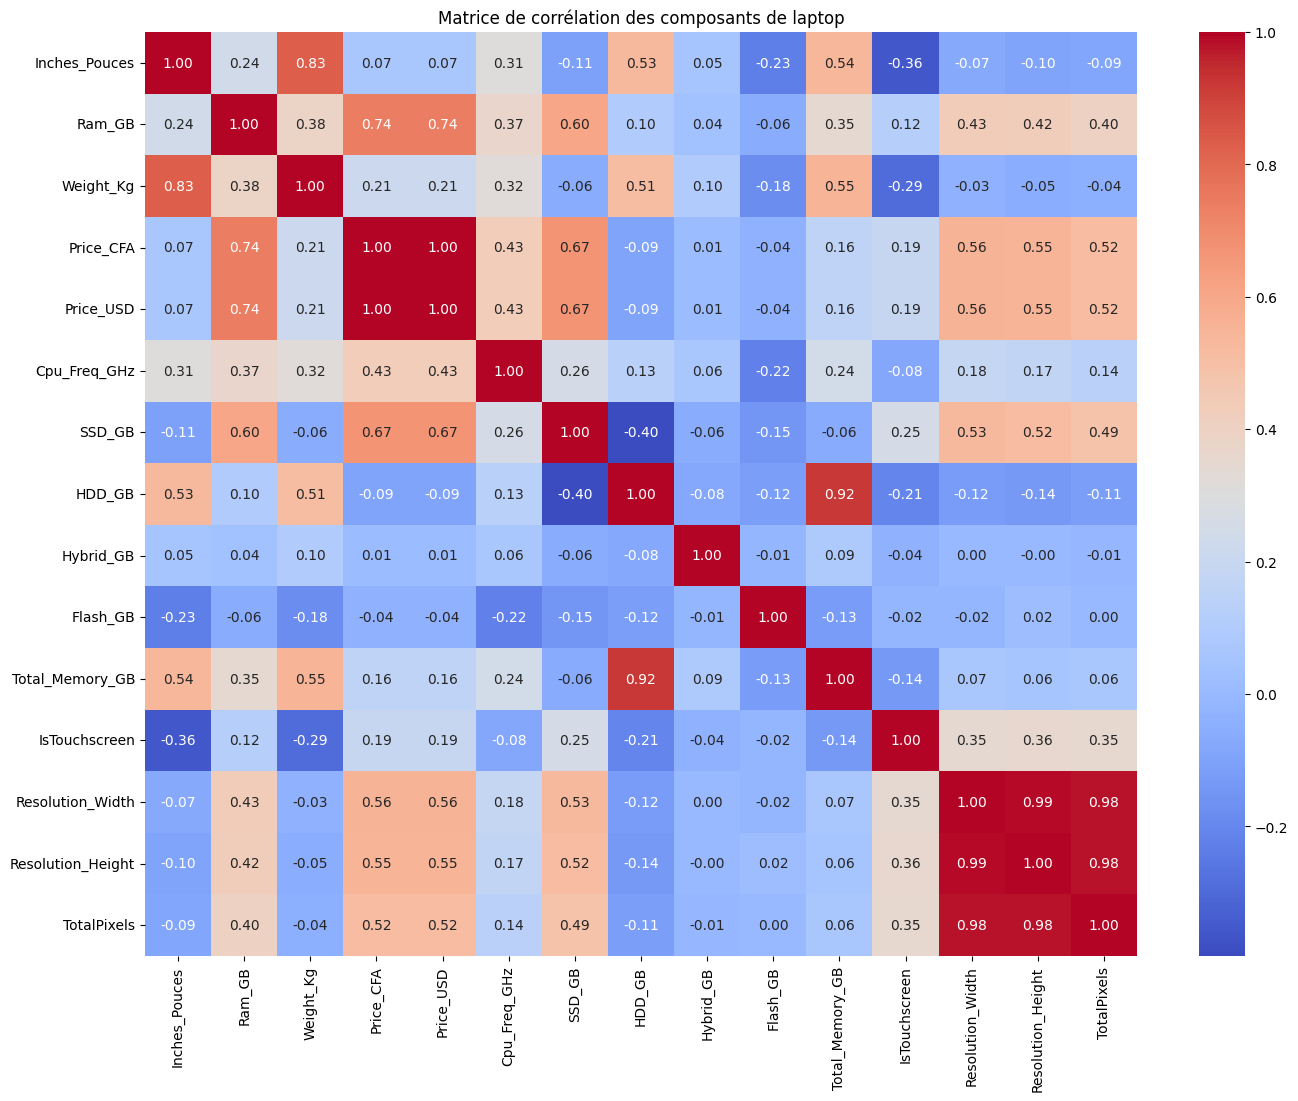

In [32]:
# Visualisation
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation des composants de laptop")
plt.show()

Création de modèle

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding pour la colonne binaire GPU_Type
le = LabelEncoder()
data['Gpu_Type_Encoded'] = le.fit_transform(data['Gpu_Brand'])

# Colonnes à encoder en one-hot
categorical_columns_1 = [
    'Company', 'OpSys', 'Gpu_Brand', 'DisplayType','ScreenResolution_Standardized',
    'Cpu_Brand', 'Cpu_Model']

# One-hot encoding
data_encoded_1 = pd.get_dummies(data, columns=categorical_columns_1, drop_first=True)

In [34]:
# Colonnes numériques à scaler
num_cols_1 = ['Ram_GB', 'Weight_Kg', 'TotalPixels', 'Total_Memory_GB', 'Resolution_Width',
              'Resolution_Height', 'Inches_Pouces', 'IsTouchscreen', 'Cpu_Freq_GHz',
              'SSD_GB']

# Initialisation du scaler
scaler = StandardScaler()

# Mise à l'échelle
data_scaled = data_encoded_1.copy()
data_scaled[num_cols_1] = scaler.fit_transform(data_scaled[num_cols_1])

In [35]:
data_encoded_1

,TypeName,Inches_Pouces,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,Weight_Kg,Price_CFA,Price_USD,...,Cpu_Model_Pentium Dual Core 4405Y,Cpu_Model_Pentium Dual Core N4200,Cpu_Model_Pentium Quad Core N3700,Cpu_Model_Pentium Quad Core N3710,Cpu_Model_Pentium Quad Core N4200,Cpu_Model_Ryzen 1600,Cpu_Model_Ryzen 1700,Cpu_Model_Xeon E3-1505M V6,Cpu_Model_Xeon E3-1535M v5,Cpu_Model_Xeon E3-1535M v6
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71379,118.96,...,False,False,False,False,False,False,False,False,False,False
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47896,79.83,...,False,False,False,False,False,False,False,False,False,False
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636,51.06,...,False,False,False,False,False,False,False,False,False,False
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195,225.33,...,False,False,False,False,False,False,False,False,False,False
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96096,160.16,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,1.80,33993,56.65,...,False,False,False,False,False,False,False,False,False,False
1299,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,1.30,79867,133.11,...,False,False,False,False,False,False,False,False,False,False
1300,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,1.50,12201,20.34,...,False,False,False,False,False,False,False,False,False,False
1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,2.19,40706,67.84,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data_scaled

,TypeName,Inches_Pouces,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,Weight_Kg,Price_CFA,Price_USD,...,Cpu_Model_Pentium Dual Core 4405Y,Cpu_Model_Pentium Dual Core N4200,Cpu_Model_Pentium Quad Core N3700,Cpu_Model_Pentium Quad Core N3710,Cpu_Model_Pentium Quad Core N4200,Cpu_Model_Ryzen 1600,Cpu_Model_Ryzen 1700,Cpu_Model_Xeon E3-1505M V6,Cpu_Model_Xeon E3-1535M v5,Cpu_Model_Xeon E3-1535M v6
0,Ultrabook,-1.204407,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,-0.075195,128GB SSD,Intel Iris Plus Graphics 640,-1.005283,71379,118.96,...,False,False,False,False,False,False,False,False,False,False
1,Ultrabook,-1.204407,1440x900,Intel Core i5 1.8GHz,-0.075195,128GB Flash Storage,Intel HD Graphics 6000,-1.050381,47896,79.83,...,False,False,False,False,False,False,False,False,False,False
2,Notebook,0.408772,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,-0.075195,256GB SSD,Intel HD Graphics 620,-0.268684,30636,51.06,...,False,False,False,False,False,False,False,False,False,False
3,Ultrabook,0.268495,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1.498767,512GB SSD,AMD Radeon Pro 455,-0.313782,135195,225.33,...,False,False,False,False,False,False,False,False,False,False
4,Ultrabook,-1.204407,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,-0.075195,256GB SSD,Intel Iris Plus Graphics 650,-1.005283,96096,160.16,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,-0.713439,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,-0.862176,128GB SSD,Intel HD Graphics 520,-0.358880,33993,56.65,...,False,False,False,False,False,False,False,False,False,False
1299,2 in 1 Convertible,-1.204407,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,1.498767,512GB SSD,Intel HD Graphics 520,-1.110512,79867,133.11,...,False,False,False,False,False,False,False,False,False,False
1300,Notebook,-0.713439,1366x768,Intel Celeron Dual Core N3050 1.6GHz,-1.255667,64GB Flash Storage,Intel HD Graphics,-0.809859,12201,20.34,...,False,False,False,False,False,False,False,False,False,False
1301,Notebook,0.408772,1366x768,Intel Core i7 6500U 2.5GHz,-0.468686,1TB HDD,AMD Radeon R5 M330,0.227393,40706,67.84,...,False,False,False,False,False,False,False,False,False,False


In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# 1. Définir X et y
X = data_scaled.drop(['Price_CFA', 'Price_USD', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Cpu_Model_Freq', 'Gpu_Model', 'HDD_GB', 'Hybrid_GB', 'Flash_GB'], axis=1)
y = data_scaled['Price_CFA']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(X_test)

In [92]:
coeffs = pd.Series(lr.coef_, index=X.columns)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7836264444727388


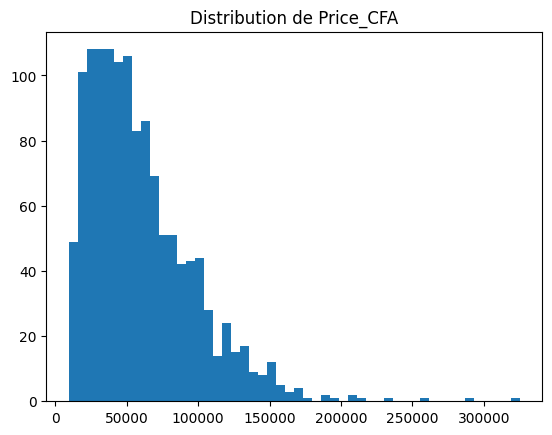

In [42]:
plt.hist(y, bins=50)
plt.title("Distribution de Price_CFA")
plt.show()

R2: 0.7836264444727388


Text(0, 0.5, 'Prédictions')

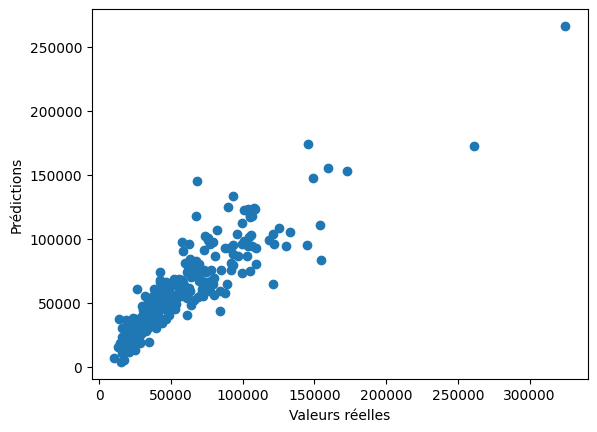

In [43]:
y_pred = lr.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")

In [93]:
# 2. Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# 3. Entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
# 4. Prédictions
y_pred = model.predict(X_test)

In [96]:
# 5. Évaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE : {rmse:.3f}")
print(f"📈 R² Score : {r2:.3f}")

📉 RMSE : 275652256.141
📈 R² Score : 0.809


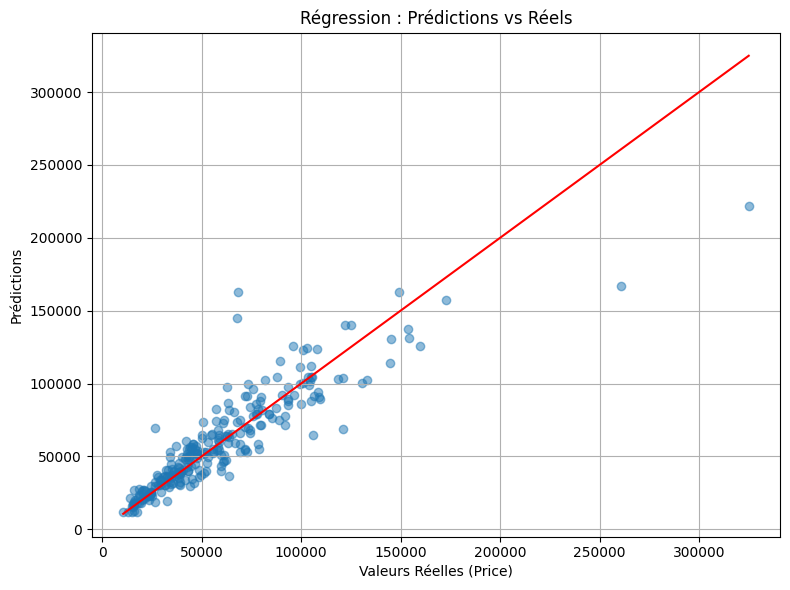

In [97]:
# 6. (Optionnel) Visualisation
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Valeurs Réelles (Price)")
plt.ylabel("Prédictions")
plt.title("Régression : Prédictions vs Réels")
plt.grid(True)
plt.tight_layout()
plt.show()

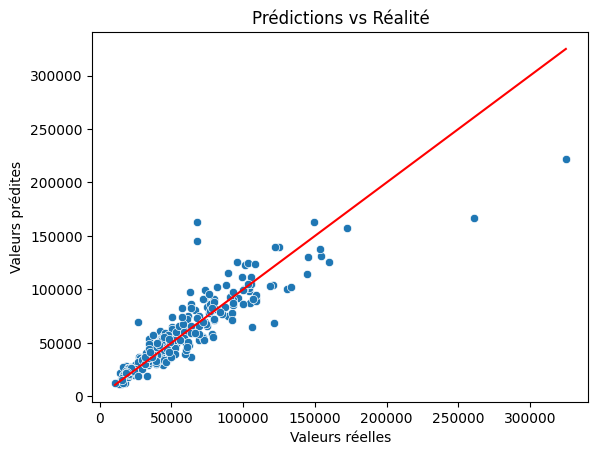

In [98]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réalité")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [99]:
rmse_scorer = make_scorer(mean_squared_error)
scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)
print(f"RMSE moyennes (CV) : {np.mean(scores):.3f}")

RMSE moyennes (CV) : 285150619.847


In [100]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8088246732278197


In [101]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
scores = cross_val_score(pipeline, X, y, cv=5, scoring=rmse_scorer)
print(f"RMSE CV corrigée : {np.mean(scores):.3f}")

RMSE CV corrigée : 286557978.181


Text(0.5, 0, 'Erreur')

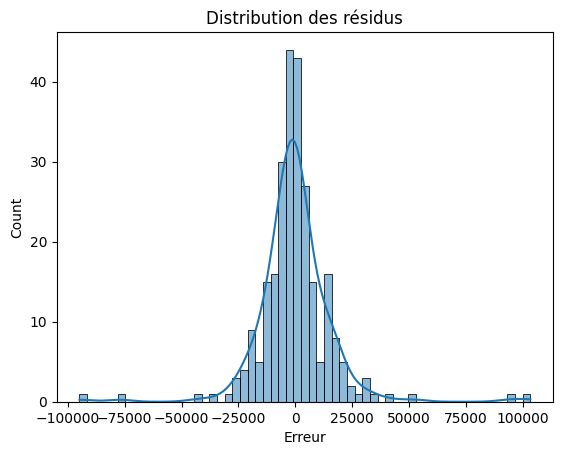

In [62]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Erreur")

In [67]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "DecisionTree": DecisionTreeRegressor(max_depth=10, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results[name] = {"R²": r2, "RMSE": rmse}

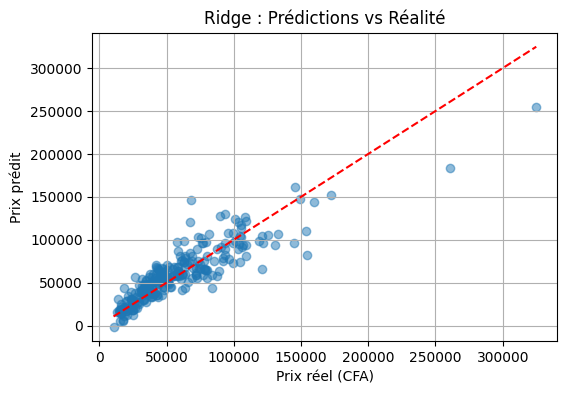

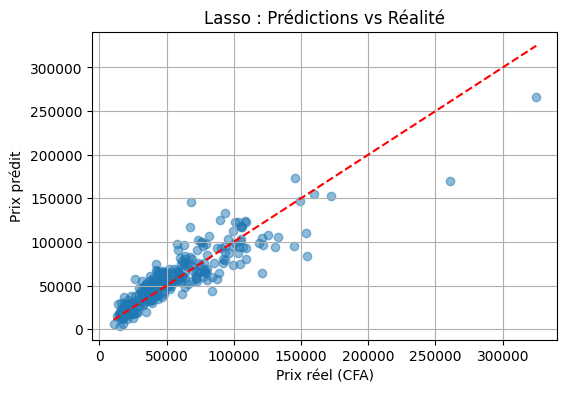

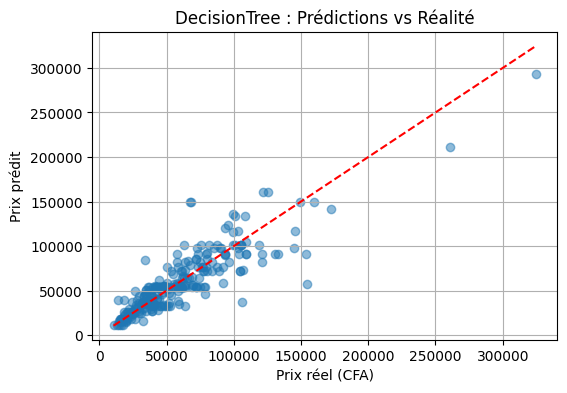

In [71]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Prix réel (CFA)")
    plt.ylabel("Prix prédit")
    plt.title(f"{name} : Prédictions vs Réalité")
    plt.grid(True)
    plt.show()

In [74]:
import xgboost as xgb

In [76]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [77]:
# === Prédiction et évaluation ===
y_pred = model.predict(X_test)

In [79]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.3f}")

RMSE : 258599616.00
R² Score : 0.821


In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
# === 5. Modèle Gradient Boosting ===
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [83]:
y_pred = gbr.predict(X_test)

In [85]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.3f}")

RMSE : 252738637.31
R² : 0.825


               Model        R²   RMSE (Test)  RMSE CV (mean)  RMSE CV (std)
4            XGBoost  0.820651  2.585996e+08    16553.591602    1563.751121
3  Gradient Boosting  0.824716  2.527386e+08    16579.014054    1860.251171
2      Random Forest  0.808825  2.756523e+08    16778.318078    1907.527799
1              Ridge  0.785771  3.088932e+08    18007.830702    2456.853644
0  Linear Regression  0.783626  3.119851e+08    18362.292144    2395.871281


/tmp/ipython-input-102-1902817624.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='RMSE CV (mean)', palette="Set2")


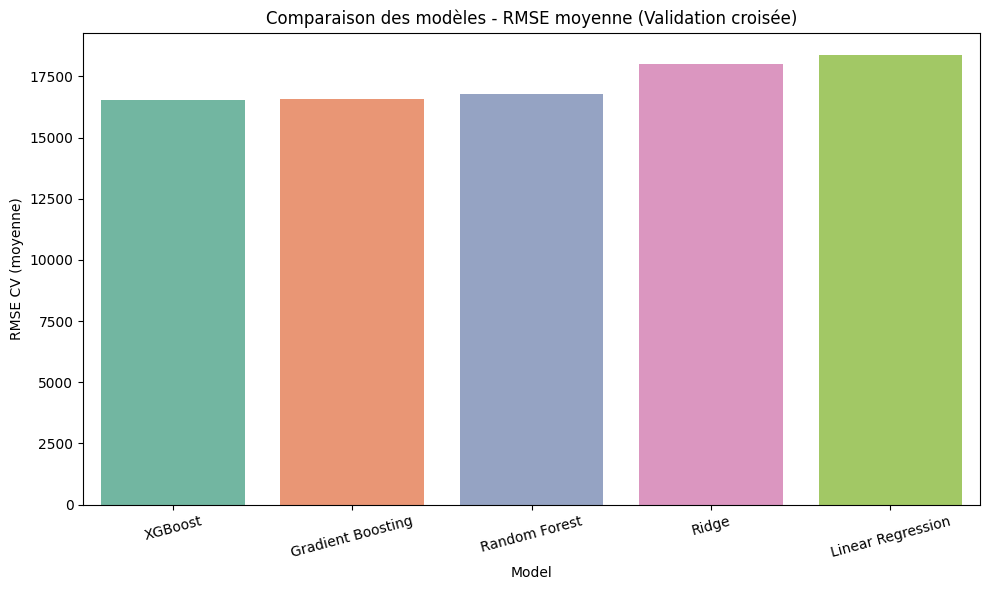

In [102]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

# === 6. Évaluation avec validation croisée ===
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

    results.append({
        "Model": name,
        "R²": r2,
        "RMSE (Test)": rmse,
        "RMSE CV (mean)": -np.mean(cv_scores),
        "RMSE CV (std)": np.std(cv_scores)
    })

# === 7. Résultats en DataFrame ===
results_df = pd.DataFrame(results).sort_values("RMSE CV (mean)")
print(results_df)

# === 8. Courbe de comparaison ===
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='RMSE CV (mean)', palette="Set2")
plt.title("Comparaison des modèles - RMSE moyenne (Validation croisée)")
plt.ylabel("RMSE CV (moyenne)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [103]:
import joblib
joblib.dump(gbr, 'modele_laptop.pkl')

['modele_laptop.pkl']

In [104]:
model = joblib.load('modele_laptop.pkl')

In [106]:
from fastapi import FastAPI
from pydantic import BaseModel

# Définir l'application FastAPI
app = FastAPI(title="Laptop Price Predictor")

# Schéma des données d'entrée
class LaptopFeatures(BaseModel):
    Ram: float
    Weight: float
    Inches: float
    TotalPixels: int
    Gpu_Brand_Code: int
    Cpu_Brand_Code: int
    OpSys_Code: int
    # ajoute ici les autres variables si tu en as

@app.post("/predict")
def predict_price(features: LaptopFeatures):
    input_data = np.array([[features.Ram, features.Weight, features.Inches,
                            features.TotalPixels, features.Gpu_Brand_Code,
                            features.Cpu_Brand_Code, features.OpSys_Code]])
    prediction = model.predict(input_data)
    return {"predicted_price": round(prediction[0], 2)}

In [ ]:
uvicorn main:app --reload

In [110]:
plt.figure(figsize=(12, 6))
for name, model in models.items():
    train_sizes, train_scores,(
        model, X_train, y_train,
        train_sizes=np.linspace(0.1, 1.0, 5),
        cv=5, scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.plot(train_sizes, label=f'{name}')
    plt.plot(train_sizes, train_scores_mean, '--', label=f'{name} (train)')

plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("RMSE")
plt.title("Courbes d'apprentissage des modèles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-110-3315209898.py, line 5)